# Packages

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from sklearn import metrics #used to calculate R^2

# Importing dataset


In [58]:
#housepricedata_bost = sklearn.datasets.load_boston()

In [59]:
housepricedata_cali = sklearn.datasets.fetch_california_housing()

In [60]:
print(housepricedata_cali)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

**Generate a more structured dataset by Pandas dataframe**

In [61]:
cali_dataframe = pd.DataFrame(housepricedata_cali.data, columns= housepricedata_cali.feature_names)

In [62]:
cali_dataframe.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


**add a target column(price) to the dataframe**

In [63]:
cali_dataframe['price'] = housepricedata_cali.target

In [64]:
cali_dataframe.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


**missing values check**

In [65]:
cali_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

**statistical measures**

In [66]:
cali_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Finding the correlation


**1. positive**

**2. negative**

In [67]:
correlations = cali_dataframe.corr()

**creating correlation heatmap**

In [68]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

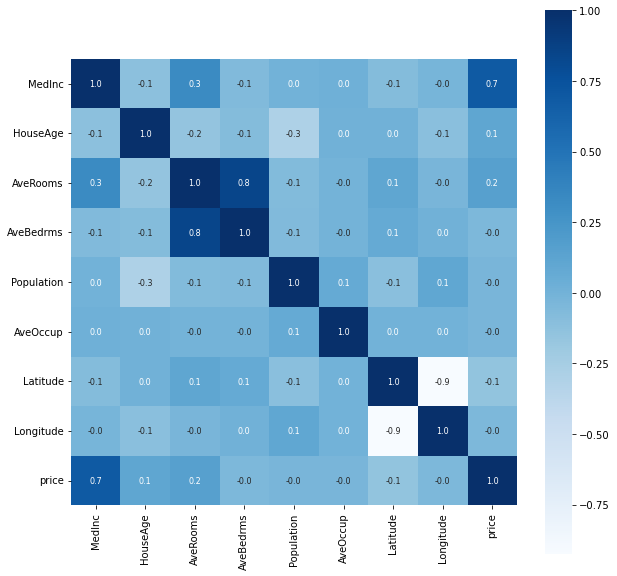

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(correlations, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap ='Blues')

# Now we split the variables and the target

**target "price" as Y and all other variables as X**

In [70]:
Y = cali_dataframe['price']
X = cali_dataframe.drop(['price'], axis=1)

**train_test_split 8:2**

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 100)

In [73]:
X.shape

(20640, 8)

In [74]:
X_test.shape

(4128, 8)

In [75]:
X_train.shape

(16512, 8)

**start training the model**

**xgboost regressor**

In [76]:
#loading the xgboost regressor
model = XGBRegressor()

In [77]:
#training the X(variables w/o "price") and Y("price")
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

**evaluat the model**


In [78]:
#predicting the X_train
X_train_prediction = model.predict(X_train)

In [79]:
print(X_train_prediction)

[0.92275137 1.9913108  1.150845   ... 1.9301736  1.3257235  2.628973  ]


In [80]:
#R^2
score1 = metrics.r2_score(Y_train, X_train_prediction)

#Mean absolute error
score2 = metrics.mean_absolute_error(Y_train, X_train_prediction)

print("R^2 =", score1)
print("mean absolute error =", score2)

R^2 = 0.9426152449348449
mean absolute error = 0.1960711203514178


In [81]:
#predict on the testing data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

#R^2
score_1 = metrics.r2_score(Y_test, X_test_prediction)

#Mean absolute error
score_2 = metrics.mean_absolute_error(Y_test, X_test_prediction)

print("R^2 =", score_1)
print("mean absolute error =", score_2)

[2.1905456  1.2268037  0.9939282  ... 1.7070519  0.94533473 1.1757532 ]
R^2 = 0.8438006697985856
mean absolute error = 0.30442799798229286


# Visualizing the actual price and prediction price

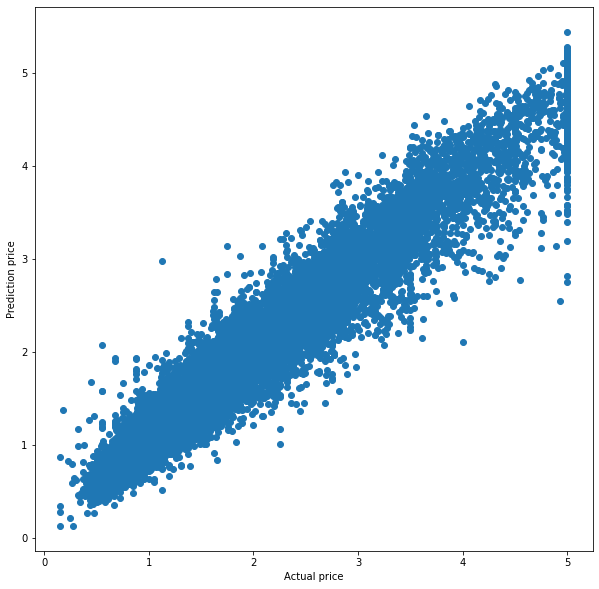

In [82]:
plt.figure(figsize=(10,10))
plt.scatter(Y_train, X_train_prediction)
plt.xlabel("Actual price")
plt.ylabel("Prediction price")
plt.show()